In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [3]:
raw_data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
raw_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
np.sum(raw_data.isnull()).sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [7]:
percentage_of_missing_values = np.sum(raw_data.isnull()).sort_values(ascending=False) / len(raw_data)
percentage_of_missing_values

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot:>

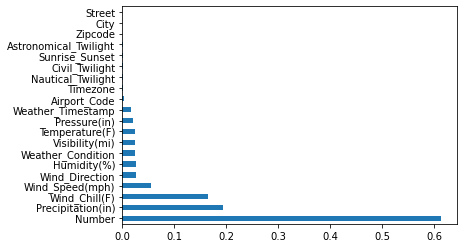

In [8]:
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind='barh')

In [9]:
data = raw_data.drop('Number',axis=1)
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
percentage_of_missing_values = np.sum(data.isnull()).sort_values(ascending=False)/ len(data)
percentage_of_missing_values

Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Signal           0.000000e+00
Traffic_Calm

<AxesSubplot:>

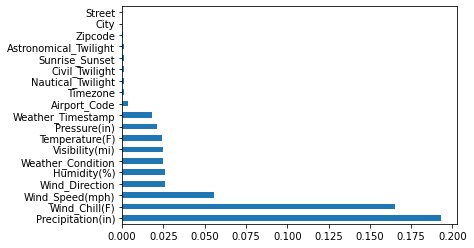

In [11]:
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind='barh')

In [12]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
data.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [14]:
cities = data.City.unique()
total_cities = len(cities)
print('total number of cities ',total_cities)

total number of cities  11682


In [15]:
cities_by_accident = data.City.value_counts()
cities_by_accident

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Chenoa              1
Township 9          1
Chauncey            1
Germfask            1
De Berry            1
Name: City, Length: 11681, dtype: int64

<AxesSubplot:>

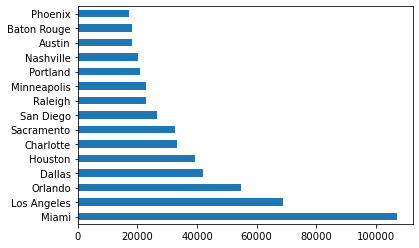

In [16]:
cities_by_accident[:15].plot(kind='barh')

<AxesSubplot:xlabel='City', ylabel='Count'>

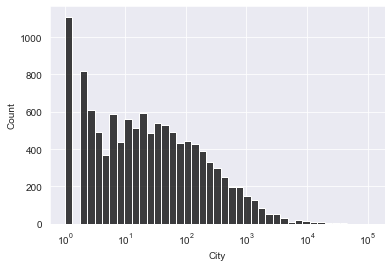

In [17]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(cities_by_accident, log_scale=True,color = 'black')

In [18]:
df = data[['Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Side', 'Street','City', 'County', 'State',
              'Country','Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
             'Wind_Speed(mph)', 'Precipitation(in)', 'Sunrise_Sunset']].copy()

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [19]:
year = df.Start_Time.dt.year

In [20]:
accidents_per_year = year.value_counts()

G:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

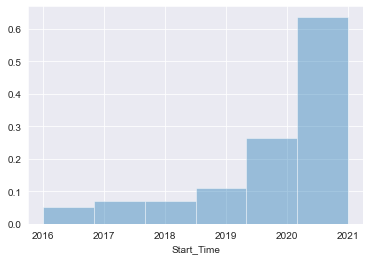

In [21]:
sns.distplot(year, bins=6, kde=False, norm_hist=True)

In [22]:
month = df.Start_Time.dt.month
month.value_counts()

12    473943
11    360696
10    299131
9     241822
6     226561
1     198365
2     194995
5     181944
8     178670
4     171880
7     159111
3     158224
Name: Start_Time, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

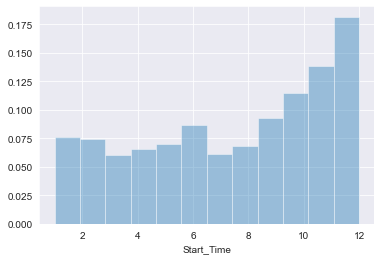

In [23]:
sns.distplot(month, bins=12, kde=False, norm_hist=True)

In [24]:
days = df.Start_Time.dt.dayofweek
days.value_counts()

4    492074
3    463477
2    455037
1    443968
0    419821
5    311691
6    259274
Name: Start_Time, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

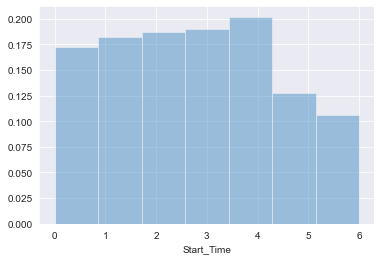

In [25]:
sns.distplot(days, bins=7, kde=False, norm_hist=True)

In [26]:
hours = df.Start_Time.dt.hour
hours.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

<AxesSubplot:xlabel='Start_Time'>

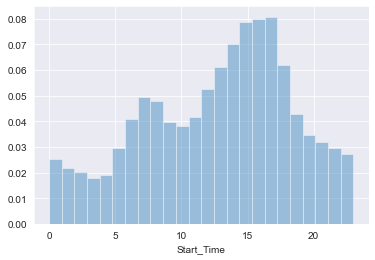

In [27]:
sns.distplot(df.Start_Time.dt.hour,norm_hist=True,bins=24,kde=False)

In [28]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [29]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [30]:
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

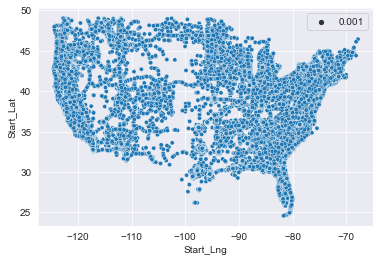

In [31]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [32]:
import folium

In [33]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [34]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1467216    36.062968
2133102    28.526300
305870     39.901270
922840     36.109197
764928     28.452957
             ...    
2217255    38.675740
1341319    34.719250
1600242    41.867621
1692824    27.300121
2472002    34.012283
Name: Start_Lat, Length: 100, dtype: float64
1467216    -86.682666
2133102    -81.386550
305870     -79.704484
922840     -86.667157
764928     -81.477669
              ...    
2217255    -77.255630
1341319   -114.311441
1600242    -75.712094
1692824    -82.451644
2472002   -118.418366
Name: Start_Lng, Length: 100, dtype: float64


In [35]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [36]:
from folium.plugins import HeatMap

In [37]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))


In [38]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [39]:
df.Side.value_counts()

R    2353309
L     492032
N          1
Name: Side, dtype: int64

In [40]:
df = df[df.Side != 'N']
df.Side.value_counts()

R    2353309
L     492032
Name: Side, dtype: int64

<AxesSubplot:xlabel='index', ylabel='Side'>

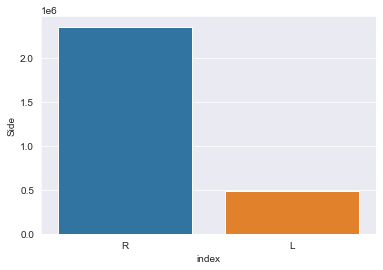

In [41]:
sns.barplot(x="index", y="Side", data=df.Side.value_counts().to_frame().reset_index())

In [42]:
df.State.value_counts()

CA    795867
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

<AxesSubplot:xlabel='index', ylabel='State'>

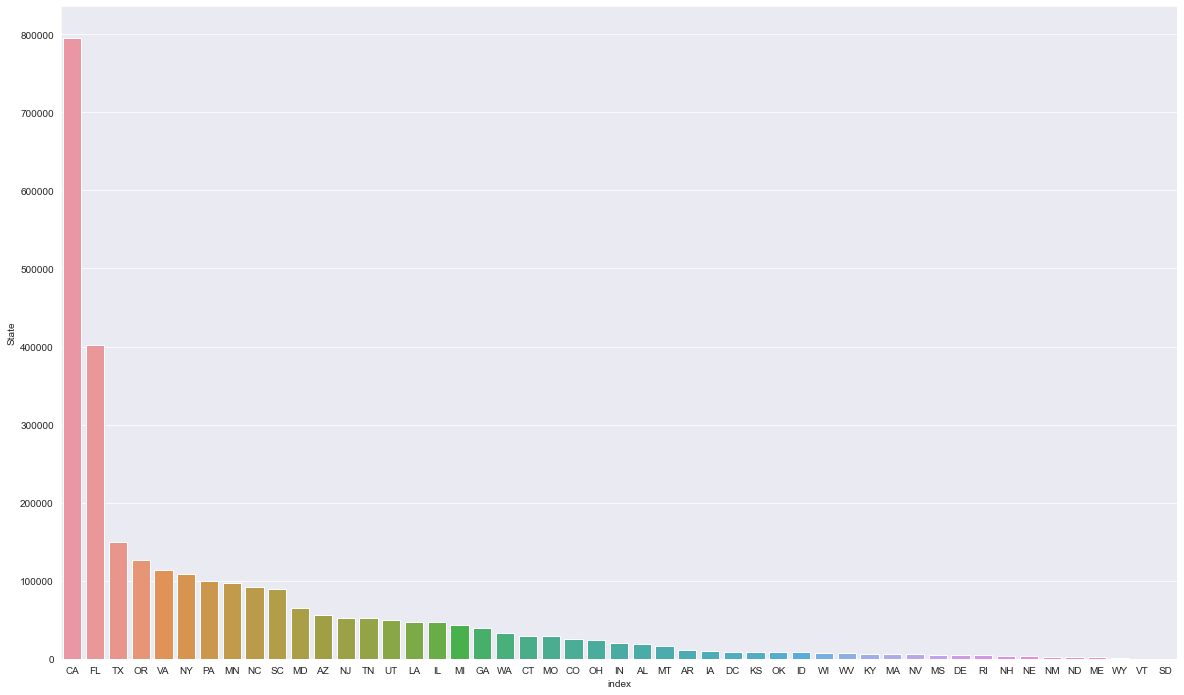

In [43]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="index", y="State", data=df.State.value_counts().to_frame().reset_index(),ax=ax)

In [44]:
df[df.State=='CA'].County.value_counts()

Los Angeles        234122
San Bernardino      55018
Orange              51331
San Diego           48366
Sacramento          46708
Riverside           42176
Alameda             38997
Santa Clara         27415
Kern                21310
Contra Costa        19726
Fresno              16310
San Joaquin         15919
San Mateo           11802
Sonoma               9653
Ventura              9554
Stanislaus           9413
Monterey             8576
Tulare               8470
Placer               8311
Solano               8302
San Francisco        6871
Santa Cruz           6747
Santa Barbara        6617
Merced               6482
Marin                5493
El Dorado            5380
San Luis Obispo      5315
Madera               4869
Yolo                 4329
Shasta               3809
Nevada               3804
Mendocino            3720
Humboldt             3597
Butte                3547
Napa                 3212
Yuba                 2672
Siskiyou             2566
Kings                2440
Lake        

<AxesSubplot:xlabel='index', ylabel='County'>

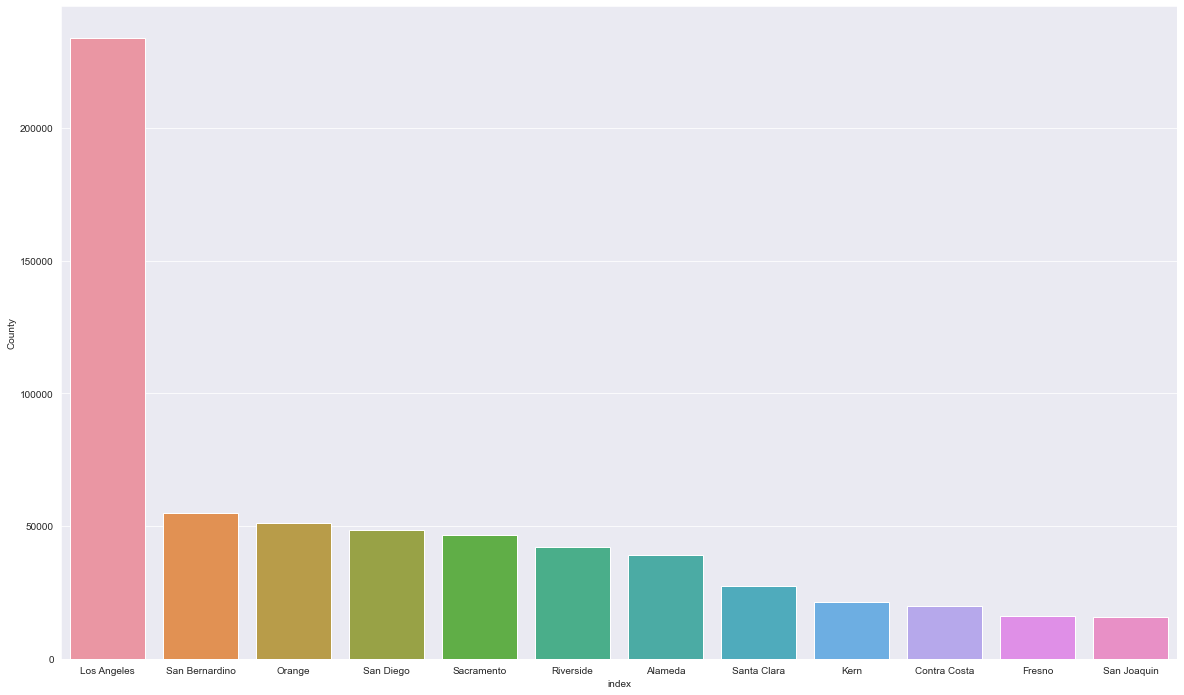

In [45]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="index", y="County", data=df[df.State=='CA'].County.value_counts().to_frame().reset_index()[:12],ax=ax)

In [46]:
df[df.County=='Los Angeles'].City.value_counts()

Los Angeles             68956
Long Beach               8862
Whittier                 7162
Baldwin Park             4694
Pomona                   4377
                        ...  
Adelanto                    1
Sherwood Forest             1
Hidden Hills                1
Palos Verdes Estates        1
Upland                      1
Name: City, Length: 156, dtype: int64

<AxesSubplot:xlabel='index', ylabel='City'>

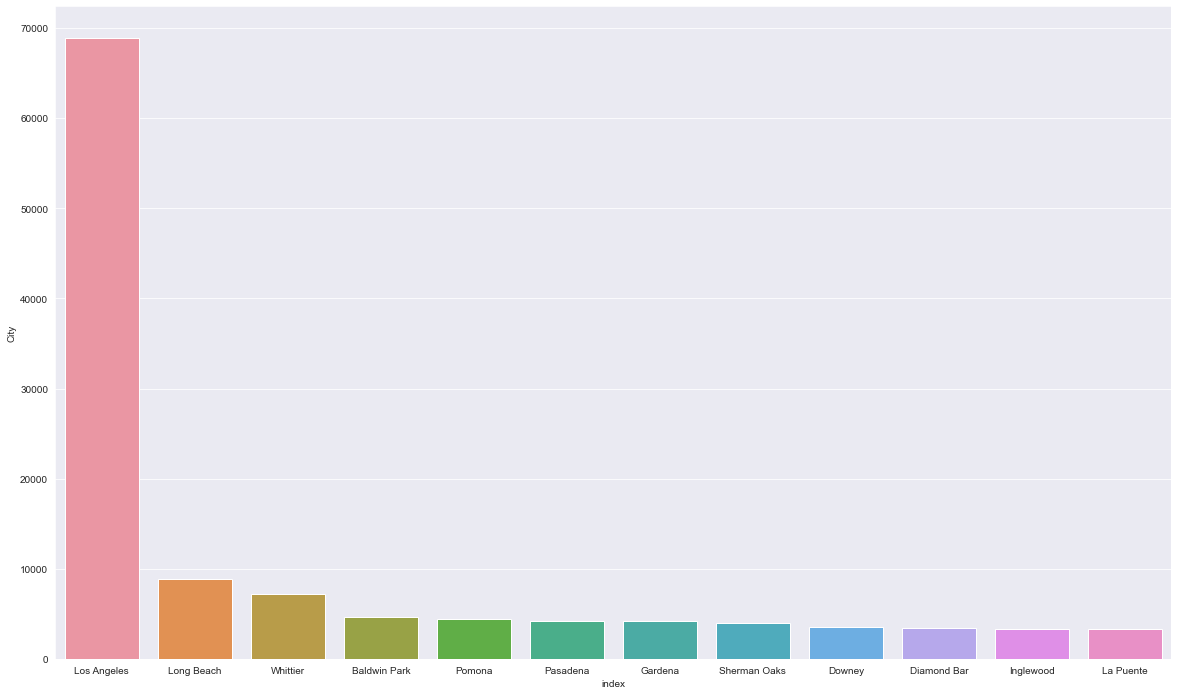

In [47]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="index", y="City", data=df[df.County=='Los Angeles'].City.value_counts().to_frame().reset_index()[:12],ax=ax)

In [48]:
df.County.value_counts()[:10]

Los Angeles       234122
Miami-Dade        143939
Orange            114917
San Bernardino     55018
Dallas             50050
San Diego          48366
Sacramento         46708
Harris             42559
Riverside          42176
Montgomery         41476
Name: County, dtype: int64

<AxesSubplot:xlabel='index', ylabel='County'>

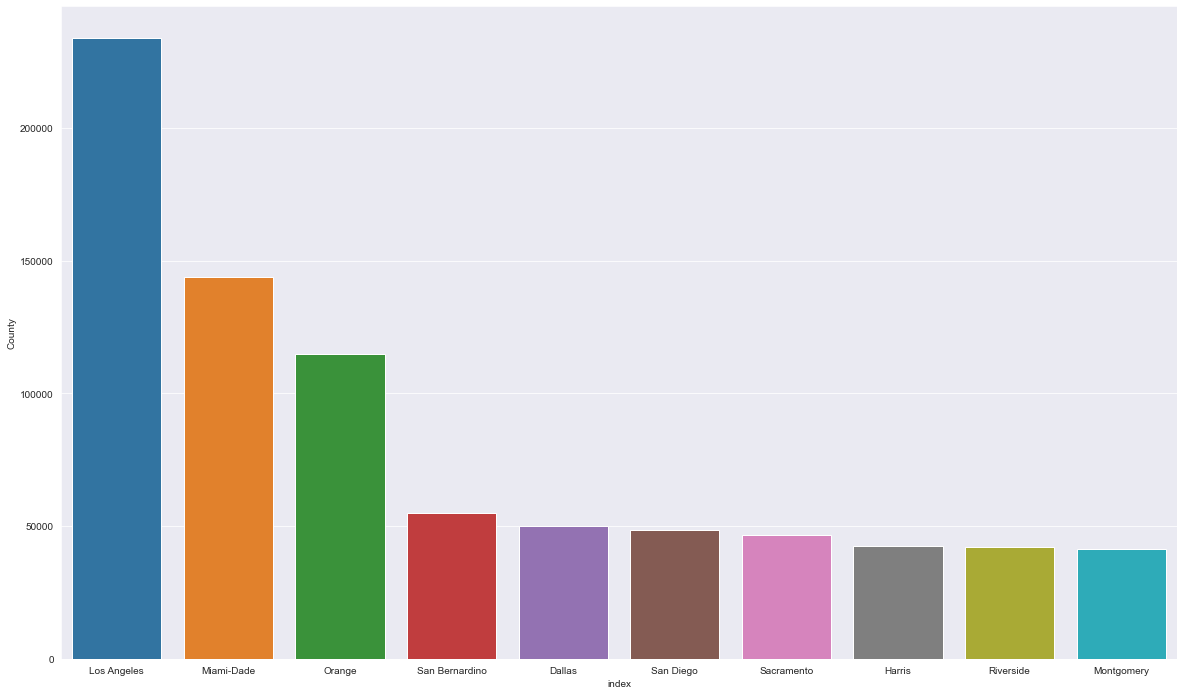

In [49]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="index", y="County", data=df.County.value_counts().to_frame().reset_index()[:10],ax=ax)

In [50]:
df.City.value_counts()[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

<AxesSubplot:xlabel='index', ylabel='City'>

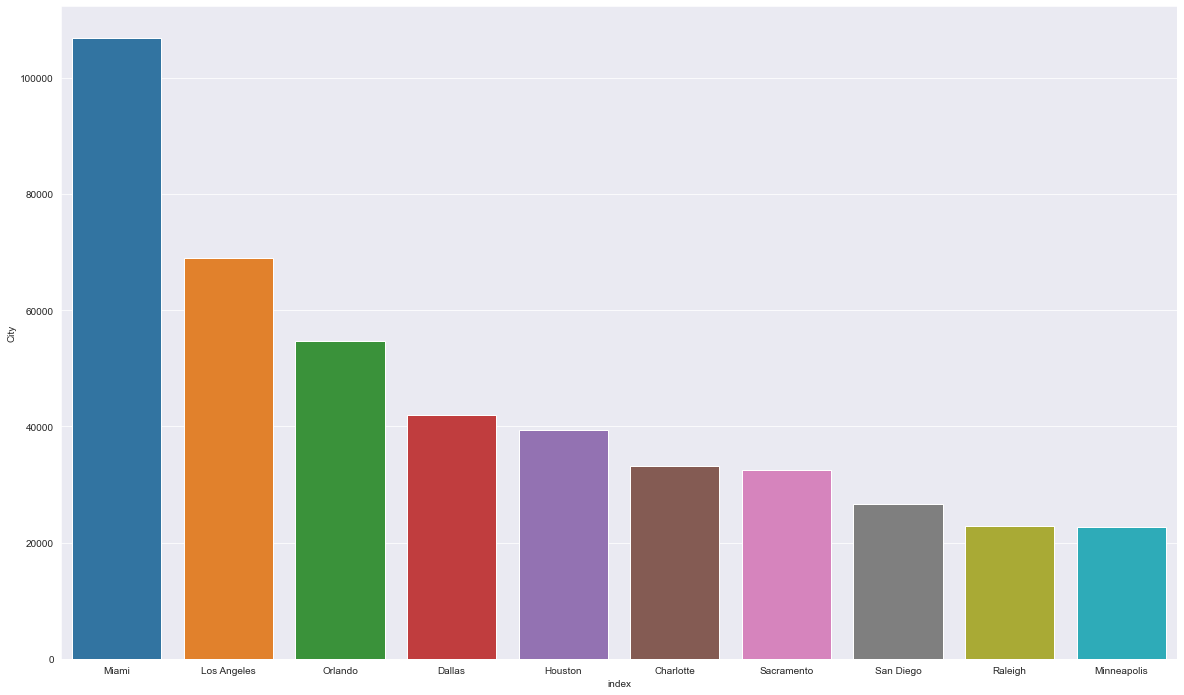

In [51]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x="index", y="City", data=df.City.value_counts().to_frame().reset_index()[:10],ax=ax)

In [52]:
df['Wind_Speed(mph)'].describe()

count    2.687398e+06
mean     7.395044e+00
std      5.527454e+00
min      0.000000e+00
25%      3.500000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

In [54]:
np.percentile(df['Wind_Speed(mph)'].dropna(), 98)

20.7

In [55]:
Windspeed = df[(df['Wind_Speed(mph)']<20)&(df['Wind_Speed(mph)']>0)].dropna()['Wind_Speed(mph)']

In [56]:
Windspeed.describe()

count    1.744306e+06
mean     8.293165e+00
std      3.812411e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      1.960000e+01
Name: Wind_Speed(mph), dtype: float64

In [57]:
wind_data = Windspeed.value_counts().reset_index()
wind_data.head(20)

,index,Wind_Speed(mph)
0,5.0,221452
1,3.0,217921
2,6.0,213183
3,7.0,197411
4,8.0,177038
5,9.0,158911
6,10.0,131403
7,12.0,111262
8,13.0,85856
9,14.0,68737


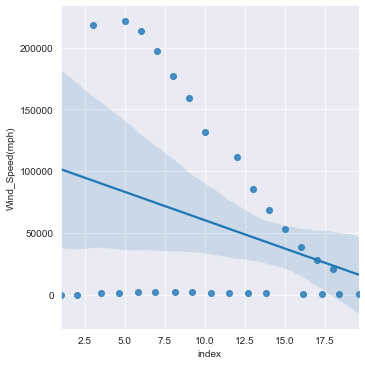

In [58]:
sns.lmplot(data=wind_data, x="index", y="Wind_Speed(mph)")

In [59]:
df['Humidity(%)'].describe()

count    2.772250e+06
mean     6.436545e+01
std      2.287457e+01
min      1.000000e+00
25%      4.800000e+01
50%      6.700000e+01
75%      8.300000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64

In [62]:
H = df['Humidity(%)'].value_counts().reset_index()

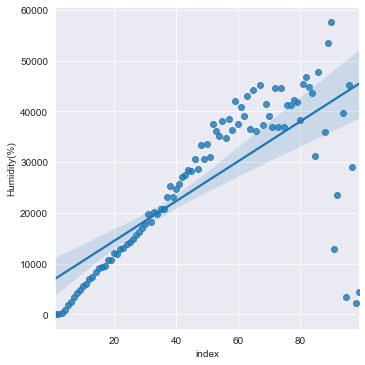

In [63]:
sns.lmplot(data=H[H["Humidity(%)"]<60000], x="index", y="Humidity(%)")

In [64]:
df['Pressure(in)'].describe()

count    2.786142e+06
mean     2.947234e+01
std      1.045286e+00
min      0.000000e+00
25%      2.931000e+01
50%      2.982000e+01
75%      3.001000e+01
max      5.890000e+01
Name: Pressure(in), dtype: float64

In [65]:
P = df['Pressure(in)'].value_counts().reset_index()
P

,index,Pressure(in)
0,29.96,43668
1,29.94,43165
2,29.99,42978
3,30.01,41736
4,30.03,41477
...,...,...
1063,58.90,1
1064,56.31,1
1065,31.14,1
1066,22.04,1


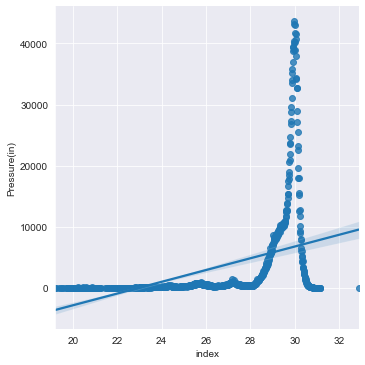

In [66]:
sns.lmplot(data=P[(P["index"]<35)&(P["index"]>18)], x="index", y='Pressure(in)')

In [67]:
df['Visibility(mi)'].describe()

count    2.774796e+06
mean     9.099391e+00
std      2.717546e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64

In [68]:
df = df[df['Visibility(mi)']<=10]

In [69]:
V = df['Visibility(mi)'].value_counts().reset_index()
V.head(20)

,index,Visibility(mi)
0,10.00,2230276
1,7.00,79649
2,9.00,68817
3,8.00,55955
4,5.00,53933
5,6.00,49051
6,2.00,46160
7,4.00,45437
8,3.00,44012
9,1.00,38445


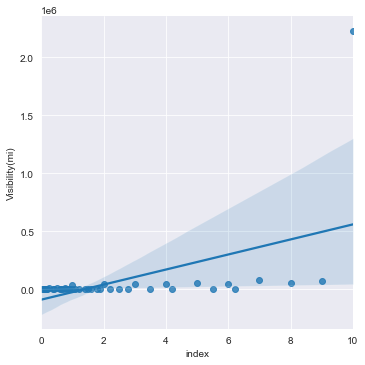

In [70]:
sns.lmplot(data=V, x="index", y='Visibility(mi)')

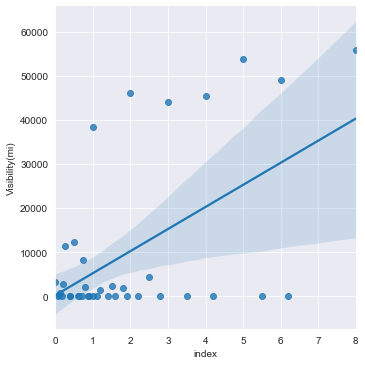

In [71]:
sns.lmplot(data=V[V['Visibility(mi)']<60000], x="index", y='Visibility(mi)')

In [72]:
df['Wind_Chill(F)'].describe()

count    2.361366e+06
mean     5.968003e+01
std      2.114066e+01
min     -8.900000e+01
25%      4.600000e+01
50%      6.300000e+01
75%      7.600000e+01
max      1.960000e+02
Name: Wind_Chill(F), dtype: float64

In [73]:
W = df['Wind_Chill(F)'].value_counts().reset_index()
W

,index,Wind_Chill(F)
0,73.0,56075
1,77.0,52863
2,75.0,52529
3,72.0,51754
4,63.0,50469
...,...,...
887,-9.7,1
888,-23.3,1
889,-52.3,1
890,-38.9,1


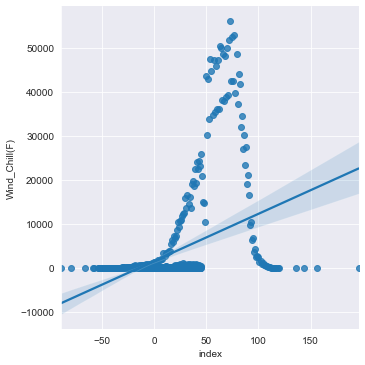

In [74]:
sns.lmplot(data=W, x="index", y='Wind_Chill(F)')

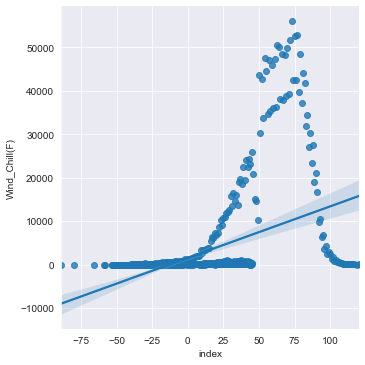

In [75]:
sns.lmplot(data=W[W["index"]<125], x="index", y='Wind_Chill(F)')

In [76]:
Day_night = df.Sunrise_Sunset.value_counts().to_frame().reset_index()
Day_night

,index,Sunrise_Sunset
0,Day,1762599
1,Night,998809


<AxesSubplot:xlabel='index', ylabel='Sunrise_Sunset'>

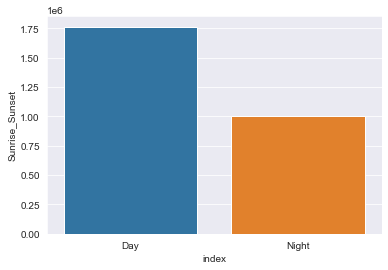

In [77]:
sns.barplot(x="index", y='Sunrise_Sunset', data=Day_night)

In [78]:
sev_DN = df[["Severity","Sunrise_Sunset"]].groupby(['Sunrise_Sunset']).mean().reset_index()
sev_DN

,Sunrise_Sunset,Severity
0,Day,2.129559
1,Night,2.146125


<AxesSubplot:xlabel='Sunrise_Sunset', ylabel='Severity'>

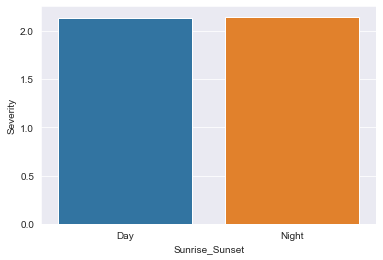

In [79]:
sns.barplot(x="Sunrise_Sunset", y='Severity', data=sev_DN)